In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
data = pd.read_csv("all_23_solenoids.csv")

In [42]:
data.head()

,x,y,z,bx,by,bz,particle,volume
0,148.399314,-15.436088,2630.000000,1.323057,-0.136882,4.996268,pi-,Solenoid_1_FieldVolume
1,-22.484999,-92.269961,2630.000000,-0.200465,0.194766,4.996268,pi+,Solenoid_1_FieldVolume
2,-329.371361,-315.304972,7010.000000,-0.978839,0.676880,1.665423,pi+,Solenoid_1_FieldVolume
3,-198.695487,-291.308802,10845.500000,-0.590491,0.487821,1.665423,pi+,Solenoid_1_FieldVolume
4,-409.597228,-330.785511,15574.723423,-0.577125,0.362600,1.023400,pi+,Solenoid_1_FieldVolume


In [43]:
z = np.array(data['z'].to_list())
bz = np.array(data['bz'].to_list())
print(len(z))

37781


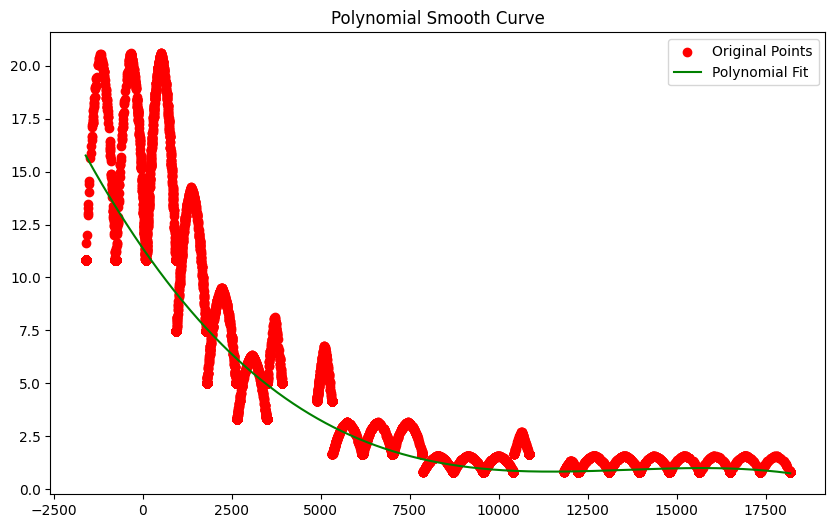

In [47]:
coefficients = np.polyfit(z, bz, 3)
polynomial = np.poly1d(coefficients)

# Generate smooth curve
z_smooth = np.linspace(z.min(), z.max(), 3000)
bz_smooth = polynomial(z_smooth)

plt.figure(figsize=(10, 6))
plt.scatter(z, bz, color='red', label='Original Points')
plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.legend()
plt.title('Polynomial Smooth Curve')
plt.show()

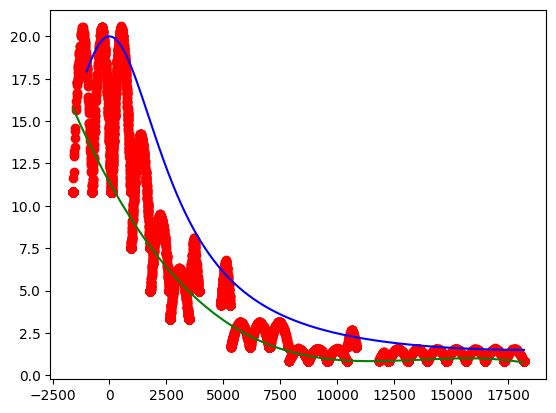

In [40]:
Bi = 20
Bf = 1.5
Lt = 18200
# -1< z < Lt
B = []

z_list = [i for i in range(-1000, 18201)] 

for zi in z_list:
    B_temp = (Bi*Bf*(Lt**3))/(Bi*(zi**2)*(3*Lt-2*zi)+Bf*((Lt-zi)**2)*(2*zi+Lt))
    B.append(B_temp)
    
plt.plot(z_list, B, color='blue')
plt.scatter(z,bz, color='red')
plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.show()

In [20]:
data = pd.read_csv("6D_vector.csv")
data.head()

,Detector,ParticleType,x[cm],px[MeV/c],y[cm],py[MeV/c],z[cm],pz[MeV/c],TotalEnergy[MeV]
0,3,pi-,-45.08120,121.4210,28.03090,65.3914,1849.95,1750.11,1761.07
1,1,mu+,-1.64279,-177.6860,-7.00516,-98.2814,399.95,1623.36,1639.42
2,2,mu+,-31.92340,101.0710,29.19240,98.8211,1099.95,1627.98,1637.52
3,4,mu+,-27.57750,101.1300,33.44150,98.6957,1169.95,1627.76,1637.29
4,3,mu+,25.21960,94.8115,38.98590,-78.7656,1849.95,1627.94,1636.02


In [21]:
det = np.array(data['Detector'].to_list())
particle = np.array(data['ParticleType'].to_list())
det1_particles = []
det2_particles = []
det3_particles = []

In [22]:
for i in range(0, len(det)):
    if det[i] == 1:
        det1_particles.append(particle[i])
    elif det[i] == 2:
        det2_particles.append(particle[i])
    elif det[i] == 3:
        det3_particles.append(particle[i])

len(det1_particles)

10988

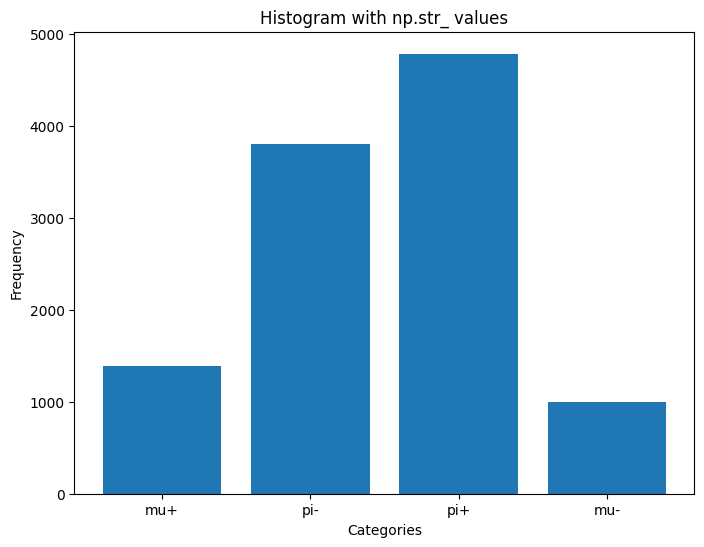

In [23]:
from collections import Counter

counts = Counter(det1_particles)
categories = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Histogram with np.str_ values')
plt.show()

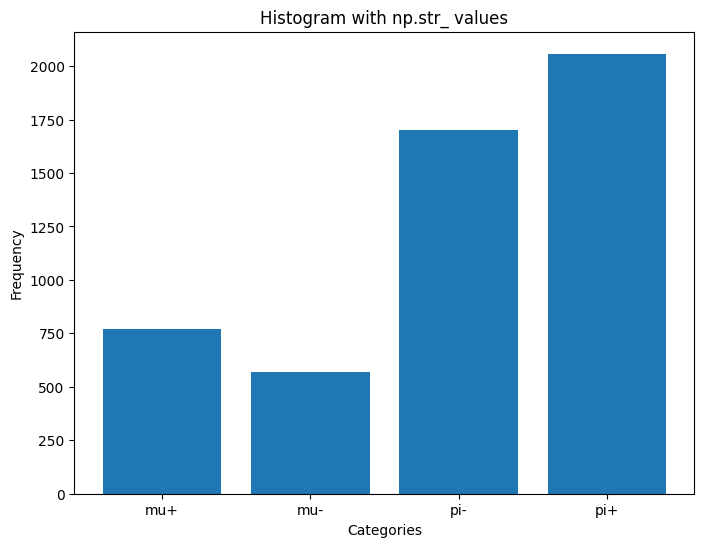

In [24]:
counts = Counter(det2_particles)
categories = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Histogram with np.str_ values')
plt.show()

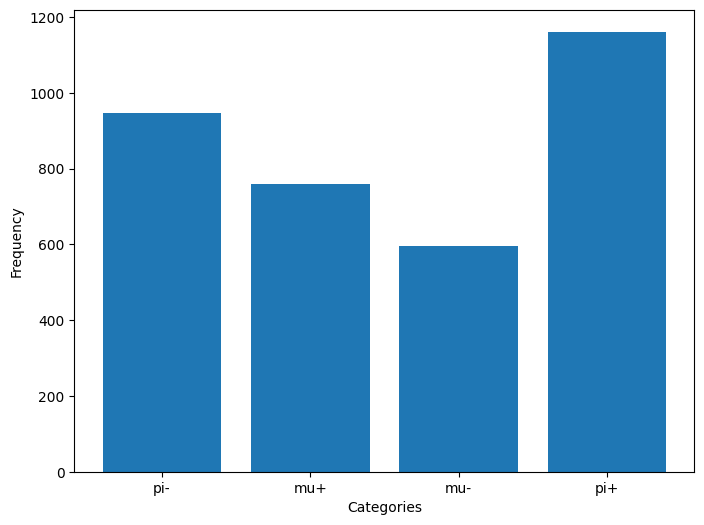

In [25]:
counts = Counter(det3_particles)
categories = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.show()

In [26]:
import math
u = 4*3.14*1e-7
N = 260
I = 61150
L = 0.830
z = 0
R = 0.7
B = (u*N*I*(((z+L/2)/math.sqrt(R*R +(z+L/2)**2))-((z-L/2)/math.sqrt(R*R + (z-L/2)**2))))/(2*L)
b = u*N*I/L
print(B, b)

12.26949440970792 24.05920963855422


In [28]:
 len(det3_particles)/10000

0.3461

In [113]:
print(260/0.830)

313.2530120481928


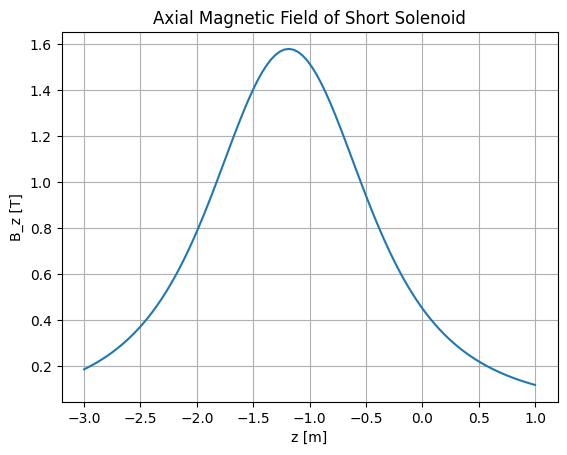

In [130]:
from scipy.constants import mu_0, pi
from scipy.integrate import dblquad

# --- Coil Parameters ---
Rc = 0.970          # central radius [m]
Zc = -1.185         # center z-position [m]
dR = 0.540          # radial thickness [m]
dZ = 0.830          # axial thickness [m]
NR = 13             # number of radial layers
NZ = 20             # number of axial turns
I = 61150         # current per turn [A]
N_total = NR * NZ   # total turns
It = N_total * I    # total ampere-turns

# --- Derived Limits ---
a = Rc - dR / 2     # inner radius [m]
b = Rc + dR / 2     # outer radius [m]
z1 = Zc - dZ / 2    # bottom z [m]
z2 = Zc + dZ / 2    # top z [m]

# --- Normalization factor ---
def K():
    return (mu_0 * It) / (2 * pi * (b**2 - a**2) * (z2 - z1))

# --- Integrand: r is inner variable, z' is outer ---
def integrand(r, z_prime, z_obs):
    return r**2 / ((r**2 + (z_prime - z_obs)**2)**1.5)

# --- Magnetic field on axis at z_obs ---
def Bz(z_obs):
    result, _ = dblquad(
        lambda r, z_prime: integrand(r, z_prime, z_obs),
        z1, z2,                      # z' limits (outer)
        lambda z_prime: a,          # r lower limit
        lambda z_prime: b           # r upper limit
    )
    return K() * result
# --- Example usage ---
z_points = np.linspace(-3, 1, 100)
B_values = [Bz(z) for z in z_points]

# --- Optional: Plotting ---
import matplotlib.pyplot as plt
plt.plot(z_points, B_values)
plt.xlabel('z [m]')
plt.ylabel('B_z [T]')
plt.title('Axial Magnetic Field of Short Solenoid')
plt.grid(True)
plt.show()


In [128]:
print(z_points)

[-3.         -2.95959596 -2.91919192 -2.87878788 -2.83838384 -2.7979798
 -2.75757576 -2.71717172 -2.67676768 -2.63636364 -2.5959596  -2.55555556
 -2.51515152 -2.47474747 -2.43434343 -2.39393939 -2.35353535 -2.31313131
 -2.27272727 -2.23232323 -2.19191919 -2.15151515 -2.11111111 -2.07070707
 -2.03030303 -1.98989899 -1.94949495 -1.90909091 -1.86868687 -1.82828283
 -1.78787879 -1.74747475 -1.70707071 -1.66666667 -1.62626263 -1.58585859
 -1.54545455 -1.50505051 -1.46464646 -1.42424242 -1.38383838 -1.34343434
 -1.3030303  -1.26262626 -1.22222222 -1.18181818 -1.14141414 -1.1010101
 -1.06060606 -1.02020202 -0.97979798 -0.93939394 -0.8989899  -0.85858586
 -0.81818182 -0.77777778 -0.73737374 -0.6969697  -0.65656566 -0.61616162
 -0.57575758 -0.53535354 -0.49494949 -0.45454545 -0.41414141 -0.37373737
 -0.33333333 -0.29292929 -0.25252525 -0.21212121 -0.17171717 -0.13131313
 -0.09090909 -0.05050505 -0.01010101  0.03030303  0.07070707  0.11111111
  0.15151515  0.19191919  0.23232323  0.27272727  0.3